In [3]:
# importing libraries

import pandas as pd

In [4]:
# Load the dataset 

df1 = pd.read_excel("labelled_textbolb.xlsx")
df1.sample(5)

,reviews_en,labels
930,all right on time very good product,1
940,the product was delivered in two days\nwell be...,1
943,I bought curtains and only one arrived in the ...,1
1856,I compared a bathtub and didn’t receive it wit...,0
1323,broken film the screen protection film came br...,0


In [5]:
text = df1['reviews_en']

## Bag Of Words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cv = CountVectorizer(decode_error='replace', encoding='utf-8')
X_bow = cv.fit_transform(text.values.astype('U')).toarray()

In [8]:
X_bow.shape

(3017, 2882)

## TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(decode_error='replace', encoding='utf-8')


In [10]:
X_tfidf = tfidf_v.fit_transform(text.values.astype('U')).toarray()

In [11]:
X_tfidf.shape

(3017, 2882)

## Model Building

In [12]:
from sklearn.model_selection import train_test_split

y = df1["labels"]

In [13]:
# for bag of words
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bow, y, test_size=0.2, random_state = 20)

# for tf-idf
Xtf_train, Xtf_test, ytf_train, ytf_test = train_test_split(X_tfidf, y, test_size=0.2, random_state = 20)

## Finding the best model using GridSearchCV
### here we use 3 model
### 1. Logistic Regression
### 2. Naive Bayes Multinomial
### 3. Random Forest

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
 algos = {
     
 'logistic_regression' : {
 'model': LogisticRegression(),
 'params': {
 'penalty': ["l2"]
 }
 },
     
 'naive_bayes': {
 'model': MultinomialNB(),
 'params': {
 'alpha': [1]   
 }
 },

 'random_forest': {
 'model': RandomForestClassifier(),
 'params': {
 'n_estimators': [100]    
 }
 }
 }

 scores = []
 cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
 for algo_name, config in algos.items():
  gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
  gs.fit(X,y)
  scores.append({
  'model': algo_name,
  'best_score': gs.best_score_,
  'best_params': gs.best_params_
  })
 return pd.DataFrame(scores,columns=['model','best_score','best_params'])

### Finding the best model According to 
## Bag of Wrds 

In [15]:
find_best_model_using_gridsearchcv(Xb_train,yb_train)

C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

,model,best_score,best_params
0,logistic_regression,0.905176,{'penalty': 'l2'}
1,naive_bayes,0.799172,{'alpha': 1}
2,random_forest,0.891925,{'n_estimators': 100}


### Finding the best model According to 
## TF-IDF

In [16]:
find_best_model_using_gridsearchcv(Xtf_train,ytf_train)

C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

,model,best_score,best_params
0,logistic_regression,0.876190,{'penalty': 'l2'}
1,naive_bayes,0.796273,{'alpha': 1}
2,random_forest,0.886128,{'n_estimators': 100}


### For all models, the difference between using Bag of Words or TF-IDF is very small. In case of Bag of Words the Best model is Logistic Regression with Score of 0.90
### and in case of TF-IDF the Best Model is Random Forest Classifier with Score of 0.885

### So we can choose  Logistic Regression as our best model 

## Make a Logistic Regression Classifier Model to Predict Sentiments

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# Trainin the Logistic Regression along with Bag Of Word proccessed data
# as the model score is good so we can use default parameter of Logistic Regression

classifier = LogisticRegression()

classifier.fit(Xb_train, yb_train)

C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# predict y with the respect of Xtf_test
y_prediction = classifier.predict(Xb_test)

## Checking Accuracy_Score, Confusion_Matrix, F1_Score

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Creat a Function that receives main y values, predicted y values and shows metrics.

def show_all_matrices(y_main, y_pred):
  print("Acuracy Score: ", accuracy_score(y_main, y_pred))
  print("\nF1-Score:", f1_score(y_main, y_pred, average='weighted'))
  print("\nConfution Matrics:")
  sns.heatmap(confusion_matrix(y_main, y_pred), annot=True)
  plt.show()

Acuracy Score:  0.9188741721854304

F1-Score: 0.9193834241749925

Confution Matrics:


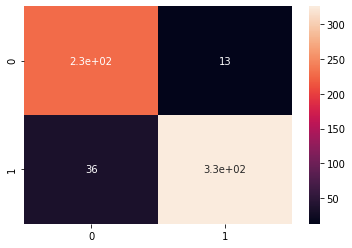

In [22]:
show_all_matrices(yb_test, y_prediction)

In [23]:
confusion_matrix(yb_test, y_prediction) # for better view

array([[229,  13],
       [ 36, 326]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
classification_report(yb_test, y_prediction)

'              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90       242\n           1       0.96      0.90      0.93       362\n\n    accuracy                           0.92       604\n   macro avg       0.91      0.92      0.92       604\nweighted avg       0.92      0.92      0.92       604\n'

### Save the model into a pickle file

In [25]:
import pickle
with open ('sentiment_analysis_logistic_c ','wb') as f:
    pickle.dump (classifier, f)

## Check the model

In [26]:
# Creat a Function that receives a sentence and prints sentiment result make by our model.

def prediction(text):
    vectorized_text = cv.transform([text])
    predict = classifier.predict(vectorized_text)

    if predict == 0:
        print("This is a Negative review")
    else:
        print("This is a Positive review")

In [27]:
prediction("I love this product ")

This is a Positive review


In [28]:
prediction("This product is bad. You breaks my trust") 

This is a Negative review
